In [3]:
import numpy as np
import pandas as pd
import datetime

In [4]:
data=pd.read_csv('/content/sap_stock.csv')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure',figsize=(16,10))
plt.rc('lines',markersize=4)


<ipython-input-6-fcb95e325558>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [7]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [9]:
 data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [12]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [14]:
df=pd.DataFrame(data,columns=['Date','Close'])

In [16]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2550 non-null   object 
 1   Close   2550 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.0+ KB


In [19]:
#checking for missing values in the columns
df.isna().values.any()

False

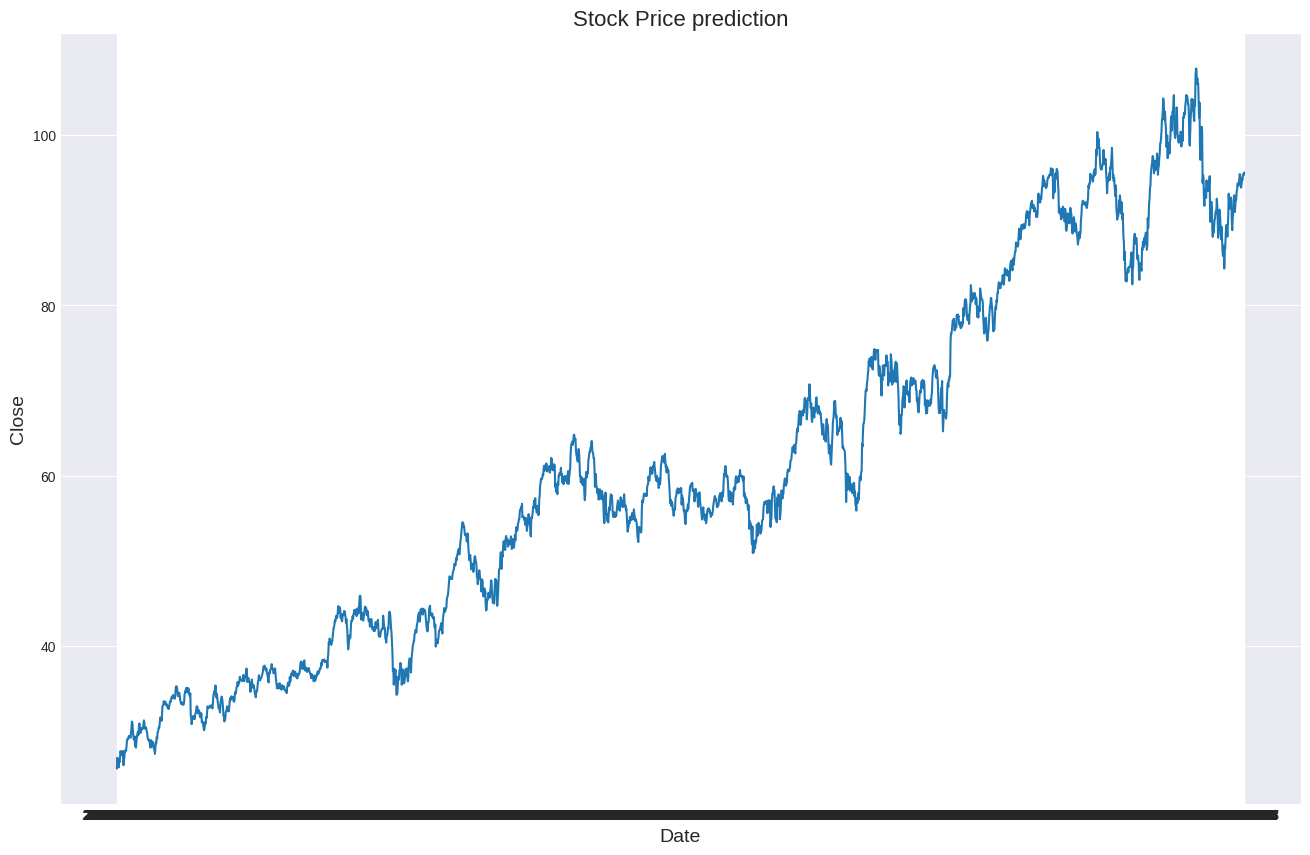

<Figure size 1000x600 with 0 Axes>

In [26]:
x=df['Date']
y=df['Close']
plt.plot(x,y)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close',fontsize=14)
plt.title('Stock Price prediction',fontsize=16)
plt.figure(figsize=(10,6))
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.20,shuffle=False)

In [36]:
x_train=np.array(train.index).reshape(-1,1)
y_train=train['Close']

In [38]:
x_train.shape

(2040, 1)

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
print('slope:',model.coef_)
print('intercept:',model.intercept_)

slope: [0.02402991]
intercept: 28.356696186509886


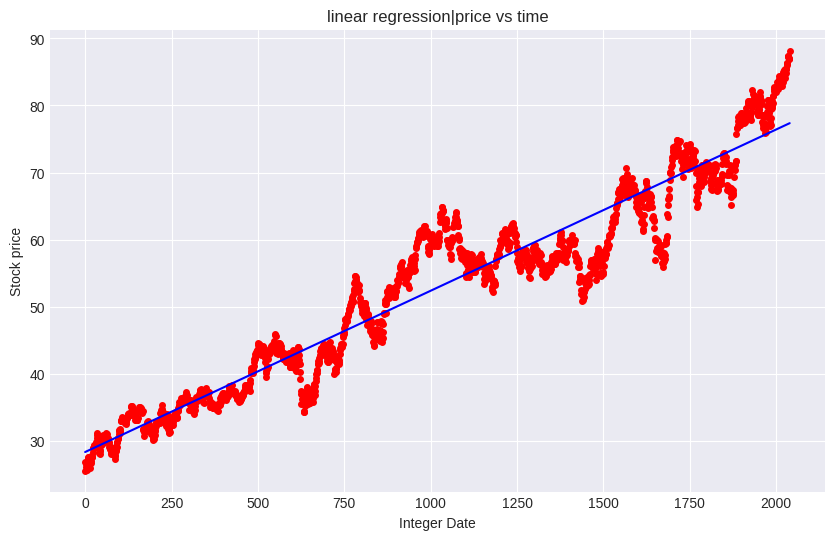

In [71]:
#ploting for training data
plt.figure(1,figsize=(10,6))
plt.title('linear regression|price vs time')
plt.scatter(x_train,y_train,color='red',label='Actual price')
plt.plot(x_train,model.predict(x_train),color='blue',label='Predicted price')
plt.xlabel('Integer Date')
plt.ylabel('Stock price')
plt.show()

In [72]:
x_test=np.array(test.index).reshape(-1,1)
y_test=test['Close']

In [73]:
x_test

array([[2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049],
       [2050],
       [2051],
       [2052],
       [2053],
       [2054],
       [2055],
       [2056],
       [2057],
       [2058],
       [2059],
       [2060],
       [2061],
       [2062],
       [2063],
       [2064],
       [2065],
       [2066],
       [2067],
       [2068],
       [2069],
       [2070],
       [2071],
       [2072],
       [2073],
       [2074],
       [2075],
       [2076],
       [2077],
       [2078],
       [2079],
       [2080],
       [2081],
       [2082],
       [2083],
       [2084],
       [2085],
       [2086],
       [2087],
       [2088],
       [2089],
       [2090],
       [2091],
       [2092],
       [2093],
       [2094],
       [2095],
       [2096],
       [2097],
       [2098],
       [2099],
       [2100],
       [2101],
       [2102],
       [2103],
       [2104],
       [2105],
       [21

In [74]:
x_test.shape

(510, 1)

In [75]:
y_pred=model.predict(x_test)
y_pred

array([77.37771117, 77.40174108, 77.42577099, 77.4498009 , 77.47383081,
       77.49786072, 77.52189063, 77.54592054, 77.56995045, 77.59398036,
       77.61801027, 77.64204018, 77.66607009, 77.69009999, 77.7141299 ,
       77.73815981, 77.76218972, 77.78621963, 77.81024954, 77.83427945,
       77.85830936, 77.88233927, 77.90636918, 77.93039909, 77.954429  ,
       77.97845891, 78.00248882, 78.02651873, 78.05054863, 78.07457854,
       78.09860845, 78.12263836, 78.14666827, 78.17069818, 78.19472809,
       78.218758  , 78.24278791, 78.26681782, 78.29084773, 78.31487764,
       78.33890755, 78.36293746, 78.38696736, 78.41099727, 78.43502718,
       78.45905709, 78.483087  , 78.50711691, 78.53114682, 78.55517673,
       78.57920664, 78.60323655, 78.62726646, 78.65129637, 78.67532628,
       78.69935619, 78.72338609, 78.747416  , 78.77144591, 78.79547582,
       78.81950573, 78.84353564, 78.86756555, 78.89159546, 78.91562537,
       78.93965528, 78.96368519, 78.9877151 , 79.01174501, 79.03

In [76]:
df.shape

(2550, 2)

In [77]:
#tooking 25 random numbers
randints=np.random.randint(2550,size=25)
#select row numbers == random numbers
df_sample=df[df.index.isin(randints)]


In [78]:
df_sample.head()

,Date,Close
265,2010-03-15,33.44
400,2010-09-22,36.45
496,2011-02-07,43.55
533,2011-03-30,43.49
615,2011-07-26,43.49


In [79]:
sample_pred = model.predict(np.array(df_sample.index).reshape(-1,1))
df_sample['prediction'] = sample_pred
df_sample.head()

<ipython-input-79-8ecc46988f34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['prediction'] = sample_pred


,Date,Close,prediction
265,2010-03-15,33.44,34.724622
400,2010-09-22,36.45,37.968660
496,2011-02-07,43.55,40.275531
533,2011-03-30,43.49,41.164638
615,2011-07-26,43.49,43.135090


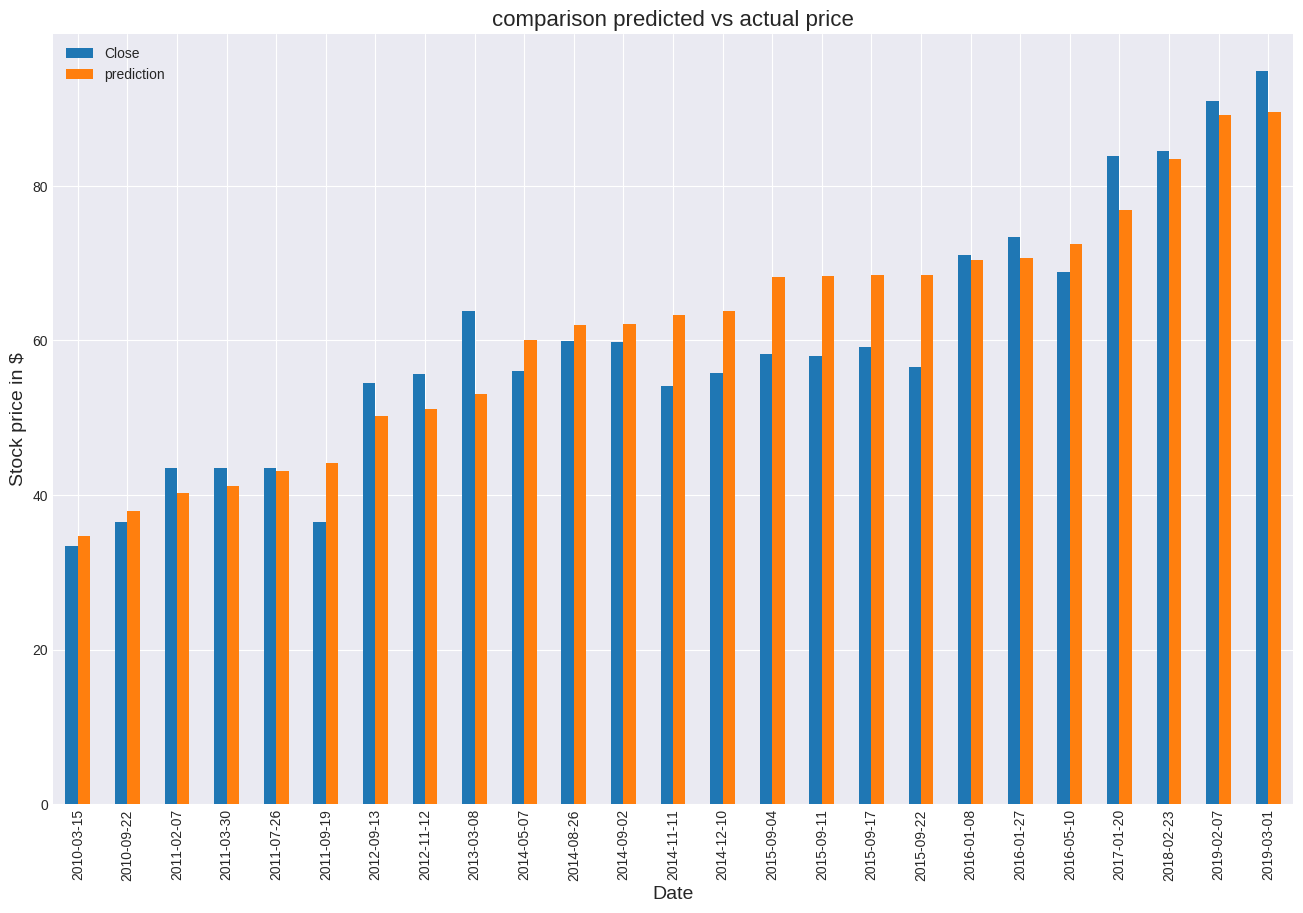

In [80]:
fig,ax=plt.subplots()
df_sample.plot(x='Date',y=['Close','prediction'],kind='bar',ax=ax)
plt.title('comparison predicted vs actual price',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Stock price in $',fontsize=14)
plt.show()

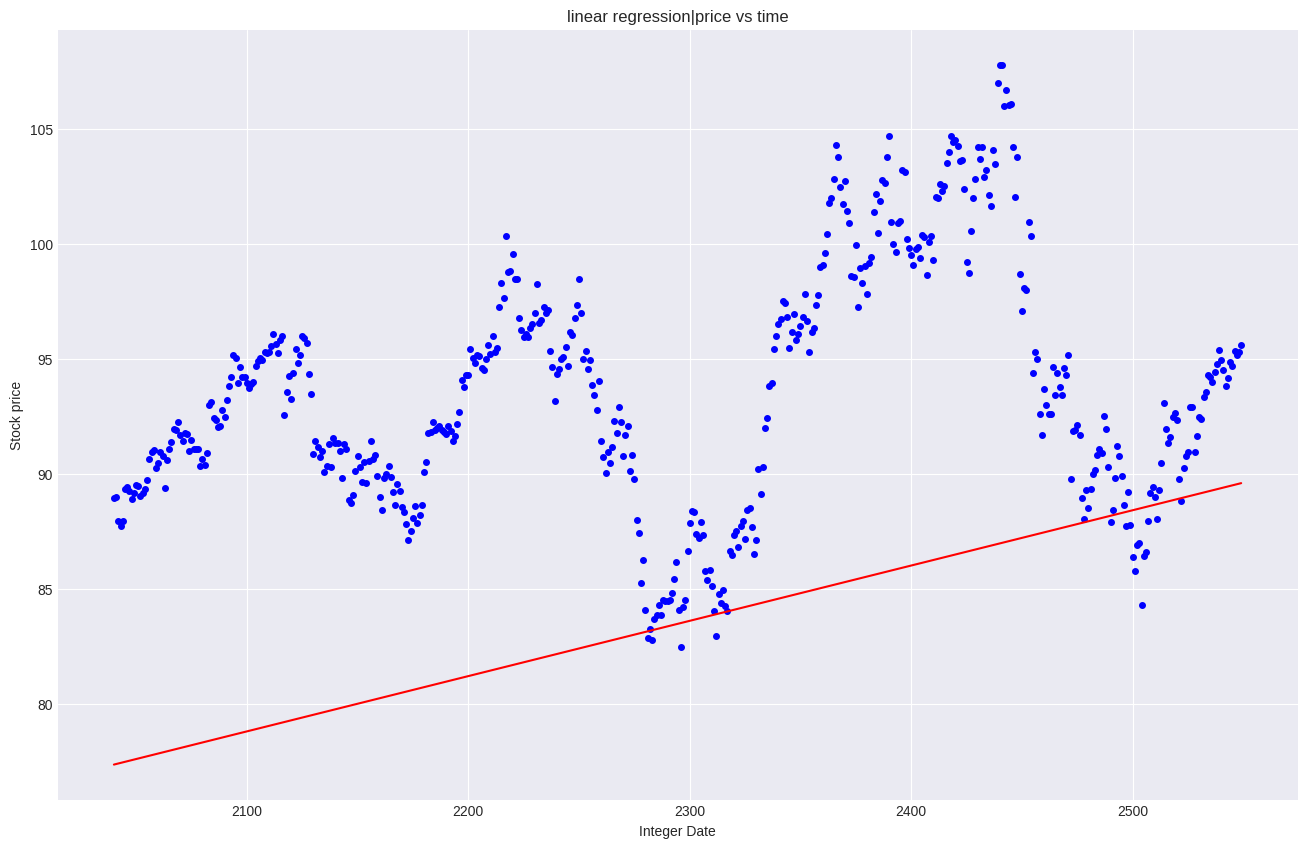

In [81]:
#ploting for test data
plt.figure(1, figsize=(16, 10))
plt.title('linear regression|price vs time')
plt.plot(x_test, model.predict(x_test), color='red', label='predicted price')
plt.scatter(x_test,y_test,  color='blue', label='actual  price')
plt.xlabel('Integer Date')
plt.ylabel('Stock price')
plt.show()

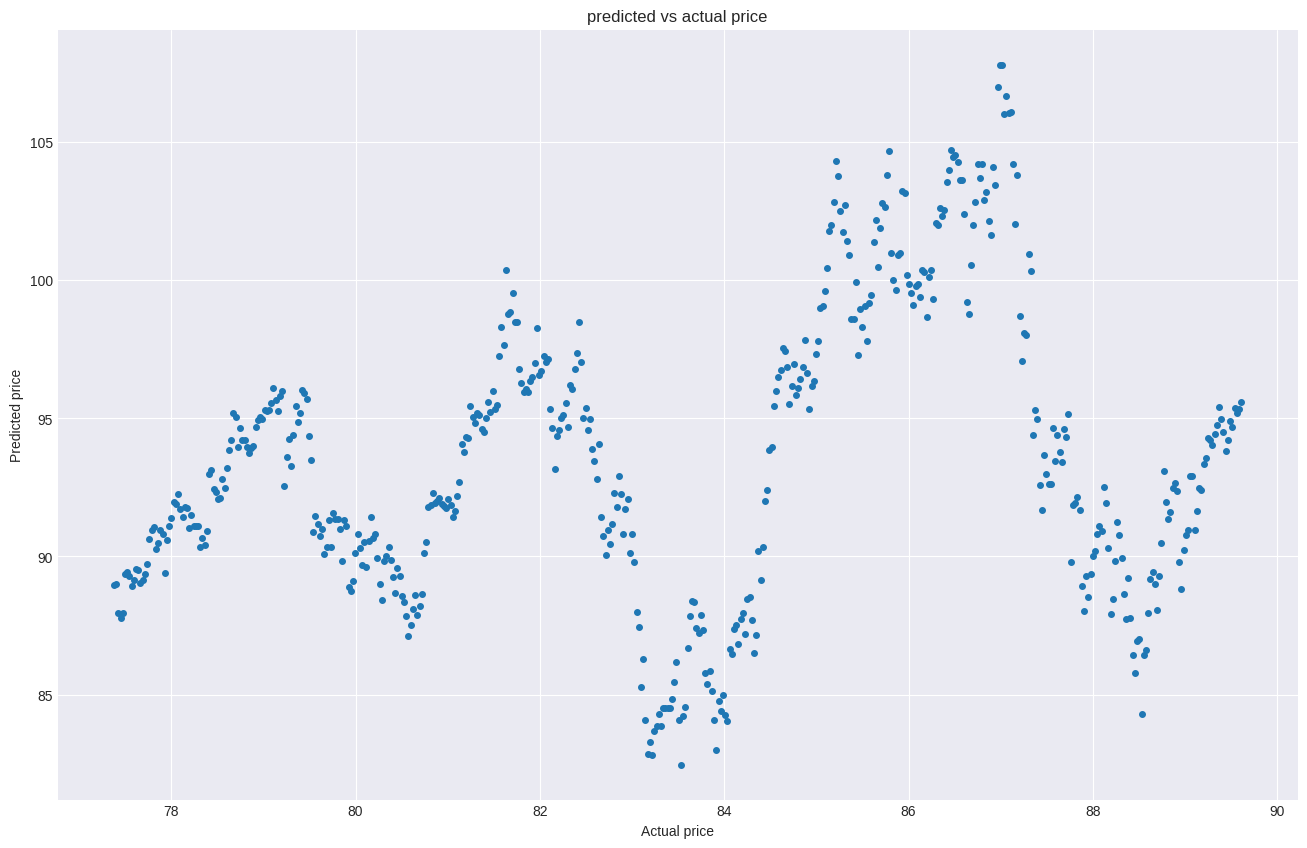

In [82]:
#plot for predicted vs actual price
plt.scatter(y_pred,y_test)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('predicted vs actual price')
plt.show()

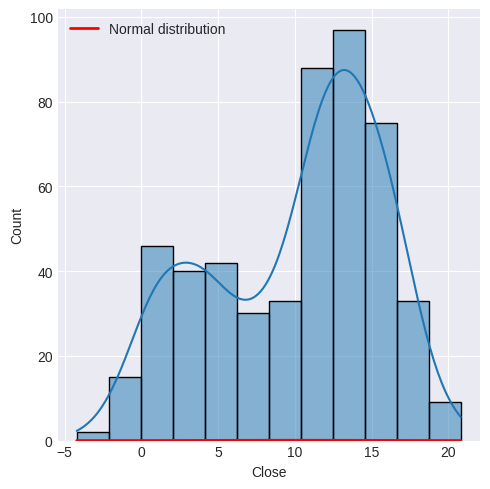

In [88]:
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Fit a normal distribution to the data: mean and standard deviation
mu, std = norm.fit(y_test - y_pred)

# Create a Seaborn displot (histogram and KDE by default)
ax = sns.displot(y_test - y_pred, kde=True)

# Generate a range of x values
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)

# Calculate the normal distribution's PDF (probability density function)
p = norm.pdf(x, mu, std)

# Plot the normal distribution curve on the existing FacetGrid
for a in ax.axes.ravel():
    a.plot(x, p, 'r', lw=2, label='Normal distribution')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()


In [92]:
df['prediction']= model.predict(np.array(df.index).reshape(-1,1))

In [93]:
df.head()

,Date,Close,prediction
0,2009-03-09,25.59,28.356696
1,2009-03-10,26.87,28.380726
2,2009-03-11,26.64,28.404756
3,2009-03-12,26.18,28.428786
4,2009-03-13,25.73,28.452816


In [98]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 10.150510717544137
Mean Squared Error: 131.83512523574703
Root Mean Squared Error: 11.481947797989113


In [100]:
print('R2',metrics.r2_score(y_test,y_pred))

R2 -3.850347606359014


In [101]:
from sklearn.metrics import explained_variance_score
print('Explained Variance Score:', explained_variance_score(y_test,y_pred))

Explained Variance Score: -0.12274684192807461
